In [43]:
#packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as ls 
from tqdm import tqdm
from scipy.signal import find_peaks
import networkx as nx 
import source_file as sf
import importlib
importlib.reload(sf)

import matplotlib as mpl
mpl.rc('font', size=18)
mpl.rc('legend', fontsize=18)
mpl.rc('legend', numpoints=1)
mpl.rc('legend', handlelength=1.5)
mpl.rc('legend', frameon=False)
#mpl.rc('xtick.major', pad=7)
#mpl.rc('xtick.minor', pad=7)
mpl.rc('lines', lw=2)
mpl.rc('xtick',labelsize =15) 
mpl.rc('ytick',labelsize =15)


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [37]:
'''Plotting all the eigenvalues of a hypercube as a function of gamma'''

#parameters
dim = 10
gamma = 1
w  = 0
kappa = 0.1

eigval = np.zeros(2**dim)

#for i in range(len(gamma)):

#Hamiltonian matrix
H = sf.hypercube_hamiltonian_networkx(dim,gamma,w,kappa)

#get the eigenvalue and right eigenstates"
eig_val,_ = np.linalg.eig(H)

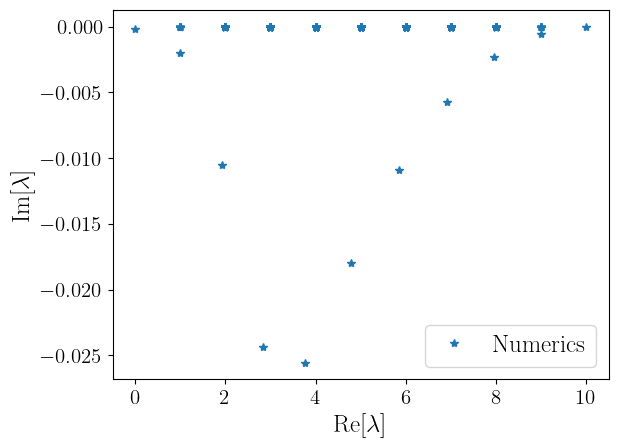

In [38]:
plt.plot(np.real(eig_val),np.imag(eig_val),'*',label = 'Numerics')

plt.legend(frameon = True)

plt.xlabel(r'Re$[\lambda]$')
plt.ylabel(r'Im$[\lambda]$')

plt.show()

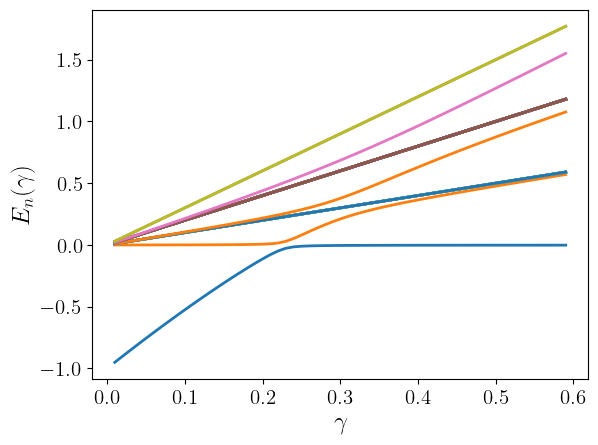

In [14]:
for i in range(len(gamma)):
    plt.plot(gamma,eigval[:,i])

plt.xlabel(r'$\gamma$')
plt.ylabel(r'$E_{n}(\gamma)$')
plt.show()

In [58]:
#parameters
dim =10
w  = 10
kappa = 10
gamma =   np.arange(0.01,0.6,0.01)


E0s, E1s, E0w, E1w = sf.overlap_hypercube(dim,gamma,w,kappa)

100%|██████████| 59/59 [01:22<00:00,  1.39s/it]


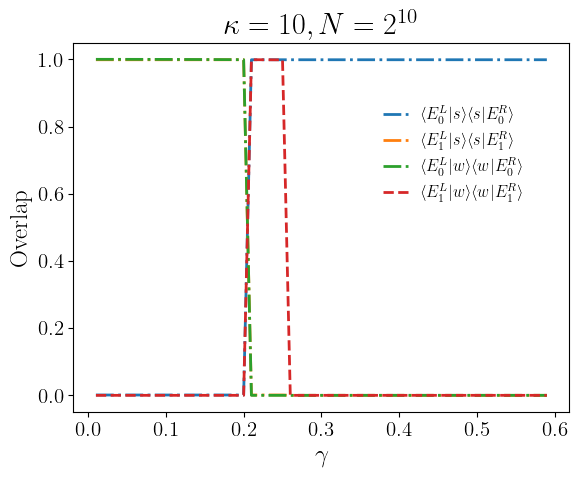

In [59]:
plt.plot(gamma, E0s,'-.',label = r'$\langle E_0^L | s \rangle \langle s | E_0^R \rangle $')

plt.plot(gamma, E1s,'-.',label = r'$\langle E_1^L | s \rangle \langle s | E_1^R \rangle$')

plt.plot(gamma, E0w,'-.',label = r'$\langle E_0^L | w \rangle \langle w | E_0^R \rangle $')

plt.plot(gamma, E1w,'--',label = r'$\langle E_1^L | w \rangle \langle w | E_1^R \rangle$')

#plt.axvline(1.0,linestyle = '--',color = 'k',linewidth =1)

plt.legend(fontsize = 12, loc = (0.61,0.55))
plt.xlabel(r'$\gamma$')
plt.ylabel(r'Overlap')
plt.title(f'$\\kappa = {kappa}, N = 2^{{10}}$')


plt.savefig(f'../Figures/Overlap_hypercube/Overlap_k{kappa}_dim{10}.pdf',bbox_inches = 'tight',dpi =600)
plt.show()

In [78]:
dim = 10
w  = 10
kappa = 0
gamma = [0.01,0.1,0.2,0.3,0.4] 

T = 400
dt = 0.01
m  = int(T/dt)

w_prob = np.zeros((len(gamma),m))
s_prob = np.zeros((len(gamma),m))
sn_prob = np.zeros((len(gamma),m))
sf_prob = np.zeros((len(gamma),m))

#target state
ket_w = np.zeros((2**dim,1))
ket_w[w] = 1

for k in tqdm(range(len(gamma))):
    
    #The Hamiltonian
    H =  sf.hypercube_hamiltonian_networkx(dim,gamma[k],w,kappa)

    #initial state
    psi_0 = (1.0/np.sqrt(2**dim))*np.ones((2**dim,1))

    #Initial overlap
    w_prob[k,0] =  (np.abs(np.vdot(ket_w,psi_0))**2) 
    s_prob[k,0] = np.abs(np.vdot(psi_0,psi_0))
    sn_prob[k,0] = (np.abs(np.vdot(ket_w,psi_0))**2) / np.abs(np.vdot(psi_0,psi_0))
    sf_prob[k,0] = (np.abs(np.vdot(psi_0,psi_0))) * (np.abs(np.vdot(ket_w,psi_0))**2)

    #Time Evolution operator
    ut = np.asarray(ls.expm(-(1.0j)*H*dt))

    for j in range(1,m):        

        #wavefunction after time evolution of dt
        psit = ut.dot(psi_0)    

        # Normalized fidelity and survival probability
        w_prob[k,j] = (np.abs(np.vdot(ket_w,psit))**2 )
        s_prob[k,j] = np.abs(np.vdot(psit,psit))
        sn_prob[k,j] = (np.abs(np.vdot(ket_w,psit))**2) / np.abs(np.vdot(psit,psit))
        sf_prob[k,j] = np.abs(np.vdot(psit,psit)) * (np.abs(np.vdot(ket_w,psit))**2)

        psi_0 = psit  

100%|██████████| 5/5 [00:29<00:00,  5.80s/it]


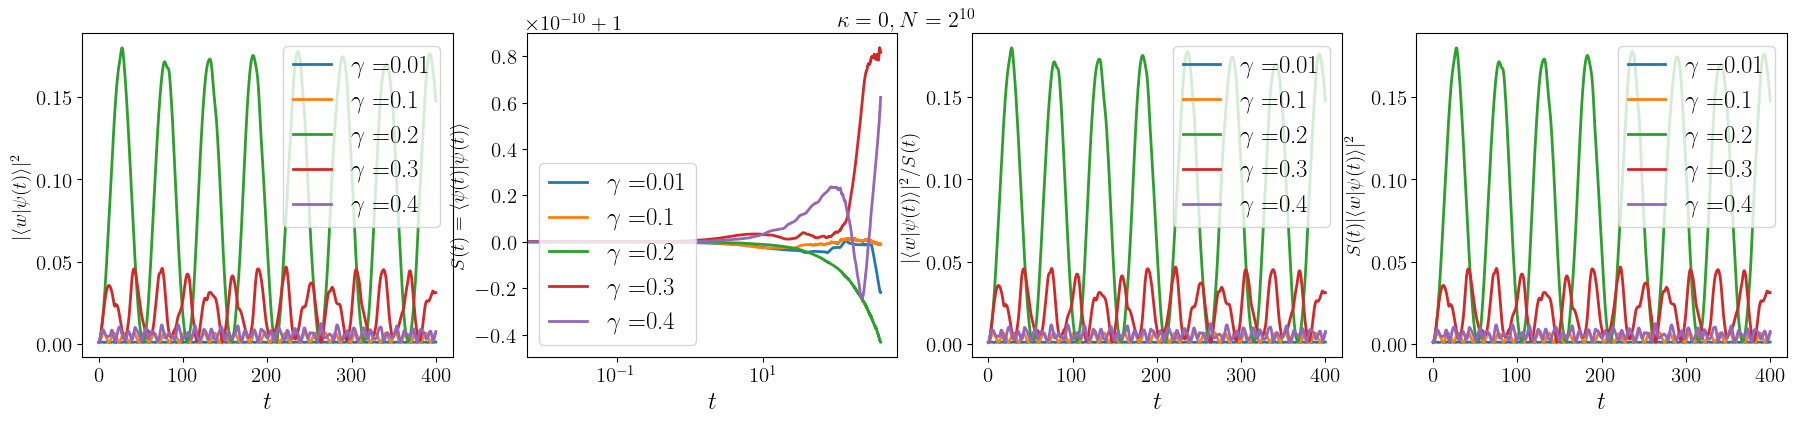

In [79]:
fig, ax = plt.subplots(1, 4, figsize=(22, 4))  # 1 row, 4 columns

ax[0].plot(np.arange(m)*dt,w_prob[0],label = f'$\\gamma =${gamma[0]}')
ax[0].plot(np.arange(m)*dt,w_prob[1],label = f'$\\gamma =${gamma[1]}')
ax[0].plot(np.arange(m)*dt,w_prob[2],label = f'$\\gamma =${gamma[2]}')
ax[0].plot(np.arange(m)*dt,w_prob[3],label = f'$\\gamma =${gamma[3]}')
ax[0].plot(np.arange(m)*dt,w_prob[4],label = f'$\\gamma =${gamma[4]}')

ax[0].legend(frameon =True,loc = 'upper right')
ax[0].set_xlabel(r'$t$')
ax[0].set_ylabel(r'$|\langle w|\psi(t)\rangle|^2$',fontsize = 14)

##############################
ax[1].plot(np.arange(m)*dt,s_prob[0],label = f'$\\gamma =${gamma[0]}')
ax[1].plot(np.arange(m)*dt,s_prob[1],label = f'$\\gamma =${gamma[1]}')
ax[1].plot(np.arange(m)*dt,s_prob[2],label = f'$\\gamma =${gamma[2]}')
ax[1].plot(np.arange(m)*dt,s_prob[3],label = f'$\\gamma =${gamma[3]}')
ax[1].plot(np.arange(m)*dt,s_prob[4],label = f'$\\gamma =${gamma[4]}')


ax[1].legend(frameon =True,loc = 'lower left')
ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$S(t) = \langle \psi(t)|\psi(t)\rangle$',fontsize = 14)
ax[1].set_xscale('log')

##############################
ax[2].plot(np.arange(m)*dt,sn_prob[0],label = f'$\\gamma =${gamma[0]}')
ax[2].plot(np.arange(m)*dt,sn_prob[1],label = f'$\\gamma =${gamma[1]}')
ax[2].plot(np.arange(m)*dt,sn_prob[2],label = f'$\\gamma =${gamma[2]}')
ax[2].plot(np.arange(m)*dt,sn_prob[3],label = f'$\\gamma =${gamma[3]}')
ax[2].plot(np.arange(m)*dt,sn_prob[4],label = f'$\\gamma =${gamma[4]}')


ax[2].legend(frameon =True,loc = 'upper right')
ax[2].set_xlabel(r'$t$')
ax[2].set_ylabel(r'$|\langle w|\psi(t)\rangle|^2 / S(t)$', fontsize = 14)

##############################
ax[3].plot(np.arange(m)*dt,sf_prob[0],label = f'$\\gamma =${gamma[0]}')
ax[3].plot(np.arange(m)*dt,sf_prob[1],label = f'$\\gamma =${gamma[1]}')
ax[3].plot(np.arange(m)*dt,sf_prob[2],label = f'$\\gamma =${gamma[2]}')
ax[3].plot(np.arange(m)*dt,sf_prob[3],label = f'$\\gamma =${gamma[3]}')
ax[3].plot(np.arange(m)*dt,sf_prob[4],label = f'$\\gamma =${gamma[4]}')


ax[3].legend(frameon =True,loc = 'upper right')
ax[3].set_xlabel(r'$t$')
ax[3].set_ylabel(r'$S(t)|\langle w|\psi(t)\rangle|^2$',fontsize = 14)


# Title for the whole figure
fig.suptitle(f'$\\kappa = {kappa}, N = 2^{{10}}$', fontsize=16)
fig.subplots_adjust(top=0.92)


plt.savefig(f'../Figures/Fidelity_hypercube_dynamics/fidelity_dynamics_kappa{kappa}-dim{dim}.pdf',bbox_inches = 'tight')
plt.show()